<a href="https://colab.research.google.com/github/YoraiLevi/PyMetaMath/blob/master/PyMetaMath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyMetaMath
**This notebook aims to provide a bridge between the metamath program to python by providing an interface between the metamath interactive shell to python objects.**
See The [Metamath: Chapter 5 - The Metamath Program](http://us.metamath.org/downloads/metamath.pdf#page=175)


Requirements:  
* the metamath program in your path: 
* set.mm
* python3

In [1]:
%cd /tmp/
!wget http://us.metamath.org/downloads/metamath.tar.bz2
!tar -xvf metamath.tar.bz2
%cd metamath
!gcc *.c -o metamath
!cp metamath /content
!cp set.mm /content
%cd /content


/tmp
--2020-08-21 18:43:54--  http://us.metamath.org/downloads/metamath.tar.bz2
Resolving us.metamath.org (us.metamath.org)... 162.215.248.186
Connecting to us.metamath.org (us.metamath.org)|162.215.248.186|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13772949 (13M) [application/x-tar]
Saving to: ‘metamath.tar.bz2’

metamath.tar.bz2    100%[===================>]  13.13M  16.7MB/s    in 0.8s    

2020-08-21 18:43:55 (16.7 MB/s) - ‘metamath.tar.bz2’ saved [13772949/13772949]

metamath/
metamath/mmhlpa.h
metamath/mminou.c
metamath/metamath.exe
metamath/mmmaci.h
metamath/ql.mm
metamath/configure.ac
metamath/hol.mm
metamath/mmunif.h
metamath/mmword.c
metamath/nf.mm
metamath/mmcmdl.h
metamath/mmutil.c
metamath/mmcmdl.c
metamath/iset.mm
metamath/mmhlpb.c
metamath/mmcmds.c
metamath/mmvstr.c
metamath/mmwtex.c
metamath/mmpfas.h
metamath/mmveri.h
metamath/mmmaci.c
metamath/metamath.1
metamath/mmpars.h
metamath/Makefile.am
metamath/peano.mm
metamath/mmhlpa.c
metamath/se

In [2]:
import pexpect.replwrap

class RegexREPLWrapper(pexpect.replwrap.REPLWrapper):
  """Generic wrapper for read-eval-print-loops, a.k.a. interactive shells
  Rather than REPLWrapper which evaluates 'prompt' and 'continuation_prompt' based on string search, this class evaluates via regex statements
  """

  PEXPECT_PROMPT = r'[PEXPECT_PROMPT>'
  # no-match regex
  #TODO: Understand the EOF error on continue statment
  PEXPECT_CONTINUATION_PROMPT = r'a^'
  def _expect_prompt(self, timeout=-1, async_=False):
    cpl = self.child.compile_pattern_list([self.prompt, self.continuation_prompt])
    return self.child.expect_list(cpl,timeout=timeout, async_=async_) 

#Running the program
to initialize the metamath program instantiate a RegexREPLWrapper as shown below. The paramaters attempt to ensure that no special 'interaction' is required after command execution.  
Note: If a partial command is provided the program may fail.

to run a command simply input the string as it would be typed into the interactive shell without pressing enter.
```python
m.run_command("set scroll CONTINUOUS")
m.run_command("r set.mm")
m.run_command("show proof sqrt2irr")
```


In [3]:
m = RegexREPLWrapper("./metamath",r"MM> |TOOLS> |MM-PA> ",None,continuation_prompt=r"\S\?\s")
#Alternative options that instead of failing on partial commands 'eats' the ? and the last letter/symbol
#m = RegexREPLWrapper("./metamath",r"MM> |TOOLS> |MM-PA> |\S\?\s",None,continuation_prompt=r"a^")
#try it with:
#m.run_command("show proof")

m.run_command("set scroll CONTINUOUS")
m.run_command("set WIDTH 1000000")
m.run_command("r set.mm")

'Reading source file "set.mm"... 39019964 bytes\r\n39019964 bytes were read into the source buffer.\r\nThe source has 182882 statements; 2567 are $a and 36361 are $p.\r\nNo errors were found.  However, proofs were not checked.  Type VERIFY PROOF * if you want to check them.\r\n'

In [4]:
def showProof(self,proof,*,lemmon=False,renumber=False,all=False):
  """Returns the [proof] as provided in metamath as a single string. this may contain \r\n or \n
  >>> showProof(m,"sqrt2irr")
  """
  #TODO: add sanitization of proof input and optional paramaters
  return self.run_command("show proof {}".format(proof))

In [5]:
import re
def showLabels(self,pattern,*,all=False):
  """Shows labels based on patterns, returns a list, could be empty
  to show all available labels:
  >>> showLabels(m,"*")
  """
  #the linear options could fail at timeout?, need to check that out.
  #first line indicates output results
  return self.run_command("show label {} /linear".format(pattern)).splitlines()[1:]
  #out = self.run_command("show label {}".format(pattern))
  #out = out.replace("The assertions that match are shown with statement number, label, and type.","").replace("\r","").replace("\n","").strip()
  #out = re.split(r"\s\s+",out)
  #return out

## Additional Settings
the metamath shell provides settings worth mentioning, SCROLL, WIDTH.  
SCROLL sets/avoid interactive prompts for scrolling  
WIDTH the length of each line. default 79. (this can ease string output parsing for now)  


In [6]:
!./metamath 'show settings' exit

Metamath - Version 0.187 16-Aug-2020          Type HELP for help, EXIT to exit.
MM> show settings
Metamath settings on 21-Aug-2020 at 6:44 PM:
(SET ECHO...) Command ECHO is OFF.
(SET SCROLL...) SCROLLing mode is PROMPTED.
(SET WIDTH...) Screen display WIDTH is 79.
(SET HEIGHT...) Screen display HEIGHT is 24.
(READ...) No source file has been read in yet.
(SET ROOT_DIRECTORY...) Root directory is "".
(SET DISCOURAGEMENT...) Blocking based on "discouraged" tags is ON.
(SET CONTRIBUTOR...) The current contributor is "?who?".
(SET UNDO...) The maximum number of UNDOs is 19.
(SET UNIFICATION_TIMEOUT...) The unification timeout parameter is 100000.
(SET SEARCH_LIMIT...) The SEARCH_LIMIT for the IMPROVE command is 50000.
(SET EMPTY_SUBSTITUTION...) EMPTY_SUBSTITUTION is not allowed (OFF).
(SET JEREMY_HENTY_FILTER...) The Henty filter is turned ON.
(OPEN LOG...) No log file is currently open.
(SHOW STATEMENT.../[TEX,HTML,ALT_HTML]) Current output mode is TEX (LaTeX).
The program is compiled fo

##To see a proof:
for the moment the is no sanitization of the text thus this function can fail easily and make the entire program stuck requiring reinisialization via the above code block.  

In [7]:
!./metamath 'help show proof' exit

Metamath - Version 0.187 16-Aug-2020          Type HELP for help, EXIT to exit.
MM> help show proof
Syntax:  SHOW PROOF <label-match> [<qualifiers (see below)>]

This command displays the proof of the specified $p statement various
formats.  The <label-match> may contain "*" (0-or-more-character match) and
"?" (single-character match) wildcard characters to match multiple
statements.  See HELP SEARCH for other label matching conventions.
Without any qualifiers, only the logical steps will be shown (i.e.
syntax construction steps will be omitted), in indented format.

Note that a compressed proof will have references to repeated parts of
the proof with "local labels" prefixed with "@".  To show all steps
in the original RPN proof, you must SAVE PROOF <label-match> / NORMAL before
using SHOW PROOF.

Most of the time, you will use
    SHOW PROOF <label-match>
to see just the proof steps corresponding to logical deduction.

Optional qualifiers:
    / ESSENTIAL - the proof tree is trimmed o

In [8]:
print(showProof(m,"sqrt2irr"))

 61           syl.1=peano2nn       $p |- ( y e. NN -> ( y + 1 ) e. NN )
110                 imbid.1=breq2        $p |- ( n = 1 -> ( z < n <-> z < 1 ) )
111               ralbidv.1=imbi1d     $p |- ( n = 1 -> ( ( z < n -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) <-> ( z < 1 -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) ) )
112             nnind.1=ralbidv      $p |- ( n = 1 -> ( A. z e. NN ( z < n -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) <-> A. z e. NN ( z < 1 -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) ) )
128                 imbid.1=breq2        $p |- ( n = y -> ( z < n <-> z < y ) )
129               ralbidv.1=imbi1d     $p |- ( n = y -> ( ( z < n -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) <-> ( z < y -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) ) )
130             nnind.2=ralbidv      $p |- ( n = y -> ( A. z e. NN ( z < n -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) <-> A. z e. NN ( z < y -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) ) )
146                 imbid.1=breq2        $p |- ( n = ( y

Exactly like in the metamath shell it is possible to print the proof in different formats:  


In [9]:
print(showProof(m,"sqrt2irr /LEMMON/RENUMBER/NO_REPEATED_STEPS"))

 1 peano2nn      $p |- ( y e. NN -> ( y + 1 ) e. NN )
 2 breq2         $p |- ( n = 1 -> ( z < n <-> z < 1 ) )
 3 2 imbi1d      $p |- ( n = 1 -> ( ( z < n -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) <-> ( z < 1 -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) ) )
 4 3 ralbidv     $p |- ( n = 1 -> ( A. z e. NN ( z < n -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) <-> A. z e. NN ( z < 1 -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) ) )
 5 breq2         $p |- ( n = y -> ( z < n <-> z < y ) )
 6 5 imbi1d      $p |- ( n = y -> ( ( z < n -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) <-> ( z < y -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) ) )
 7 6 ralbidv     $p |- ( n = y -> ( A. z e. NN ( z < n -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) <-> A. z e. NN ( z < y -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) ) )
 8 breq2         $p |- ( n = ( y + 1 ) -> ( z < n <-> z < ( y + 1 ) ) )
 9 8 imbi1d      $p |- ( n = ( y + 1 ) -> ( ( z < n -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) <-> ( z < ( y + 1 ) -> A. x e. ZZ ( sqr

#Parsing a proof into a tree like structure.
Ultimately now that we can have the textual output of proofs in python it would be useful to parse them into useful object such as Trees and [DAG](https://en.wikipedia.org/wiki/Directed_acyclic_graph)'s  
this has been left as an exercise for the user.
Good Luck!

In [10]:
import re
proof = showProof(m,"sqrt2irr /LEMMON/NO_REPEATED_STEPS")
#Assuming table-row like of the form Line-number Hyp{Optional} Ref{Optional} $Statement
pattern = r"^\s*(\d+)\s(?:((?:\d+\,*)*)\s)?(\S+)\s+(\$.*)$" 
#                 id    hyp1,hyp2,hyp3      ref    statment
unpacked = [re.search(pattern,line).groups() for line in proof.splitlines()]
raw_nodes = [{
              "id":id,
              "hypotheses":(hyps.split(",") if hyps is not None else None),
              "reference":ref,
              "statement":statement
              } for (id,hyps,ref,statement) in unpacked]

In [11]:
raw_nodes

[{'hypotheses': None,
  'id': '33',
  'reference': 'peano2nn',
  'statement': '$p |- ( y e. NN -> ( y + 1 ) e. NN )'},
 {'hypotheses': None,
  'id': '46',
  'reference': 'breq2',
  'statement': '$p |- ( n = 1 -> ( z < n <-> z < 1 ) )'},
 {'hypotheses': ['46'],
  'id': '47',
  'reference': 'imbi1d',
  'statement': '$p |- ( n = 1 -> ( ( z < n -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) <-> ( z < 1 -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) ) )'},
 {'hypotheses': ['47'],
  'id': '48',
  'reference': 'ralbidv',
  'statement': '$p |- ( n = 1 -> ( A. z e. NN ( z < n -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) <-> A. z e. NN ( z < 1 -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) ) )'},
 {'hypotheses': None,
  'id': '50',
  'reference': 'breq2',
  'statement': '$p |- ( n = y -> ( z < n <-> z < y ) )'},
 {'hypotheses': ['50'],
  'id': '51',
  'reference': 'imbi1d',
  'statement': '$p |- ( n = y -> ( ( z < n -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z ) ) <-> ( z < y -> A. x e. ZZ ( sqrt ` 2 ) =/= ( x / z 

## Constructing a tree like structure out of the list

In [12]:
import weakref

class Node():
  #Note that dictionaries are not weak referencable
  def __init__(self,* ,id:int, hypotheses:list=None, reference:str=None, statement:str):
    self.id=id
    if hypotheses:
      self.hypotheses = hypotheses #list of nodes
    else :
      self.hypotheses = []
    self.reference = reference
    self.statement = statement
  def __str__(self):
    outstring = "<Node: Line Number: {}, Hypotheses: {}, Reference: {}, Statement:  {}>"
    return outstring.format(self.id,self.hypotheses,self.reference,self.statement)
  def __repr__(self):
    return self.__str__()

node_dict = {node["id"]:Node(id=node["id"],hypotheses=node["hypotheses"],reference=node["reference"],statement=node["statement"]) for node in raw_nodes}
for node in node_dict.values():
  #update ids to weak references
  node.hypotheses = [weakref.proxy(node_dict[hypothesis_id]) for hypothesis_id in node.hypotheses]

##Visualizing the graph like structure
https://stackoverflow.com/questions/7670280/tree-plotting-in-python
networkx matplotlib graphviz http://etetoolkit.org/

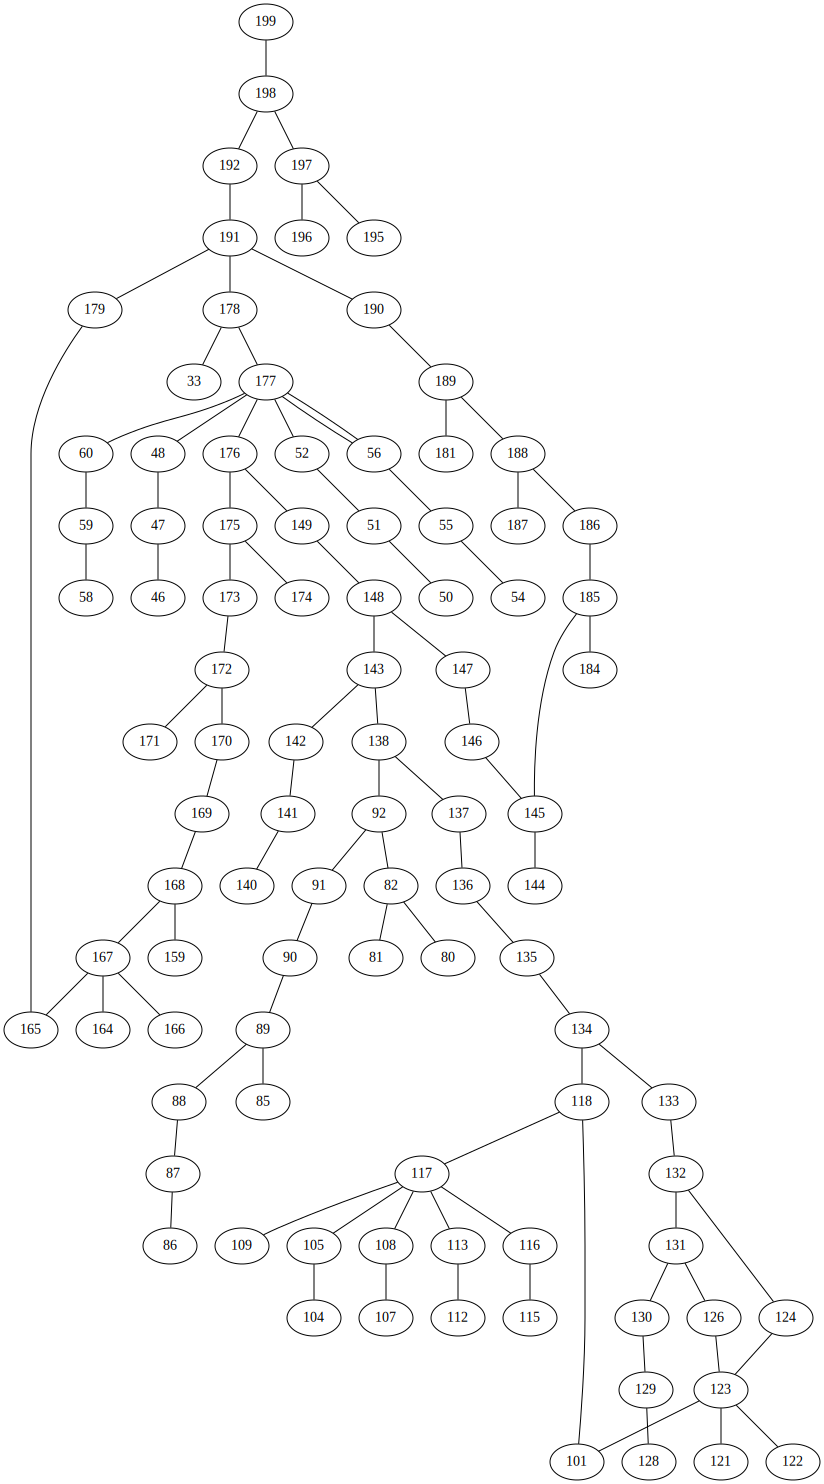

In [13]:
#https://graphviz.readthedocs.io/en/stable/manual.html#jupyter-notebooks
from graphviz import Graph
g = Graph(format='svg')
for node in node_dict.values():
  for hypothesis in node.hypotheses:
    g.edge(node.id,hypothesis.id)
#to save a file use g.render()
g

# Statistics on proofs and lemmas
TODO
---

